In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [3]:
wildfires = pd.read_csv('wildfires.csv')
lst = ['time','lat','lon','class','day']
wildfires.dropna(inplace=True)
print(wildfires['class'].value_counts())
X = wildfires.drop(lst, axis=1)
y = wildfires['class']
# y.replace('fire', 1,inplace=True)
# y.replace('no_fire',0,inplace=True)
X['area'] = X['area'].apply(lambda x: x/1000000)
X.head()
# x = X.head(235)
# x
# x['lst_night'].mean()

fire       249
no_fire    235
Name: class, dtype: int64


,area,evi,lst_day,lst_night
0,13.738155,0.216975,307.487500,289.228750
1,12.020886,0.242957,305.820000,283.662857
2,545.233030,0.398504,300.717102,291.531937
3,41.214465,0.265087,310.887083,290.742083
4,85.863469,0.202601,317.291400,294.068200


In [4]:
wildfires.groupby('class').mean()

,area,evi,lat,lon,lst_day,lst_night,day
class,,,,,,,
fire,3.875236e+07,0.256550,38.225213,-120.950106,301.747675,286.115603,166.626506
no_fire,3.061855e+07,0.254987,37.551944,-120.365905,298.591464,283.460925,182.531915


In [15]:
# make training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [16]:
print('Accuracy:')
print(accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy:
0.5702479338842975
Confusion Matrix:
[[43 24]
 [28 26]]
              precision    recall  f1-score   support

        fire       0.61      0.64      0.62        67
     no_fire       0.52      0.48      0.50        54

    accuracy                           0.57       121
   macro avg       0.56      0.56      0.56       121
weighted avg       0.57      0.57      0.57       121



## Parameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

In [20]:
params = {
    'C': [0.1, 0.5, 1, 5, 10, 20], 
    'kernel': ['linear', 'rbf', 'poly'], 
    'degree': [2, 3, 7, 10],
    'gamma': np.power(10, np.linspace(-2,5, 25)),
    'max_iter': [100000]
}
svc = SVC()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
f1_scorer = make_scorer(f1_score, pos_label='fire')
acc_scorer = make_scorer(accuracy_score)
scoring = 'accuracy'
n_folds=5
scaler = StandardScaler()

In [21]:
cv = GridSearchCV(svc, param_grid=params, scoring=scoring, n_jobs=-1, verbose=20, refit='accuracy', cv=n_folds)

In [22]:
cv.fit(scaler.fit_transform(X_train), y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 2130 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 2145 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 2175 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 2190 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 2205 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 2220 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 2235 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 2250 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 2265 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 2280 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 2295 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 2310 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 2325 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 2340 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 2355 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4170 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 4185 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 4200 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 4215 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 4230 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 4245 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 4260 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 4275 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 4290 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 4305 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 4320 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 4335 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 4350 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 4365 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 4380 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 4395 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6150 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 6165 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 6180 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 6195 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 6210 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 6225 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 6255 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 6270 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 6285 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 6315 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 6330 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 6345 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 6360 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 6375 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8018 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8025 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8032 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8039 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8046 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8053 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8060 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8067 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8074 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8081 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8095 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8102 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8109 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8116 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8123 tasks      | elapsed: 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 20], 'degree': [2, 3, 7,...
       2.15443469e+00, 4.21696503e+00, 8.25404185e+00, 1.61559810e+01,
       3.16227766e+01, 6.18965819e+01, 1.21152766e+02, 2.37137371e+02,
       4.64158883e+02, 9.08517576e+02, 1.77827941e+03, 3.48070059e+03,
       6.81292069e+03, 1.33352143e+04, 2.61015722e+04, 5.10896977e+04,
       1.00000000e+05]),
                         'kernel': ['linear', 'rbf', 'poly'],
                         'max_iter': [100000]},
             pre_dispatch='2*n_jobs', refit='accurac

In [23]:
df = pd.DataFrame(cv.cv_results_)
params = [c for c in df.columns if 'param_' in c and 'kernel' not in c]
df[params] = df[params].astype(float)
df.to_csv('cv_results.csv', index=False)

In [18]:
df = pd.read_csv('cv_results.csv')

In [24]:
df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1291,0.004580,0.000204,0.000920,0.000013,10.0,3.0,0.287298,rbf,100000.0,"{'C': 10, 'degree': 3, 'gamma': 0.287298483335...",0.730769,0.730769,0.688312,0.636364,0.688312,0.695090,0.034894,1
1441,0.004662,0.000217,0.000923,0.000010,10.0,10.0,0.287298,rbf,100000.0,"{'C': 10, 'degree': 10, 'gamma': 0.28729848333...",0.730769,0.730769,0.688312,0.636364,0.688312,0.695090,0.034894,1
1216,0.007416,0.005692,0.000916,0.000010,10.0,2.0,0.287298,rbf,100000.0,"{'C': 10, 'degree': 2, 'gamma': 0.287298483335...",0.730769,0.730769,0.688312,0.636364,0.688312,0.695090,0.034894,1
1366,0.004581,0.000211,0.000919,0.000011,10.0,7.0,0.287298,rbf,100000.0,"{'C': 10, 'degree': 7, 'gamma': 0.287298483335...",0.730769,0.730769,0.688312,0.636364,0.688312,0.695090,0.034894,1
1369,0.005387,0.001194,0.000916,0.000018,10.0,7.0,0.562341,rbf,100000.0,"{'C': 10, 'degree': 7, 'gamma': 0.562341325190...",0.653846,0.730769,0.740260,0.636364,0.688312,0.689922,0.040915,5
1294,0.004965,0.000319,0.000977,0.000109,10.0,3.0,0.562341,rbf,100000.0,"{'C': 10, 'degree': 3, 'gamma': 0.562341325190...",0.653846,0.730769,0.740260,0.636364,0.688312,0.689922,0.040915,5
1219,0.004679,0.000089,0.000914,0.000018,10.0,2.0,0.562341,rbf,100000.0,"{'C': 10, 'degree': 2, 'gamma': 0.562341325190...",0.653846,0.730769,0.740260,0.636364,0.688312,0.689922,0.040915,5
1444,0.004692,0.000083,0.000908,0.000012,10.0,10.0,0.562341,rbf,100000.0,"{'C': 10, 'degree': 10, 'gamma': 0.56234132519...",0.653846,0.730769,0.740260,0.636364,0.688312,0.689922,0.040915,5
697,0.003848,0.000014,0.000972,0.000007,1.0,3.0,1.100694,rbf,100000.0,"{'C': 1, 'degree': 3, 'gamma': 1.1006941712522...",0.692308,0.705128,0.675325,0.649351,0.714286,0.687339,0.023002,9
847,0.003923,0.000169,0.000971,0.000008,1.0,10.0,1.100694,rbf,100000.0,"{'C': 1, 'degree': 10, 'gamma': 1.100694171252...",0.692308,0.705128,0.675325,0.649351,0.714286,0.687339,0.023002,9


In [25]:
y_pred = cv.predict(scaler.transform(X_test))

In [26]:
print('Accuracy:')
print(accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy:
0.7628865979381443
Confusion Matrix:
[[45  7]
 [16 29]]
              precision    recall  f1-score   support

        fire       0.74      0.87      0.80        52
     no_fire       0.81      0.64      0.72        45

    accuracy                           0.76        97
   macro avg       0.77      0.75      0.76        97
weighted avg       0.77      0.76      0.76        97



In [27]:
import seaborn as sns

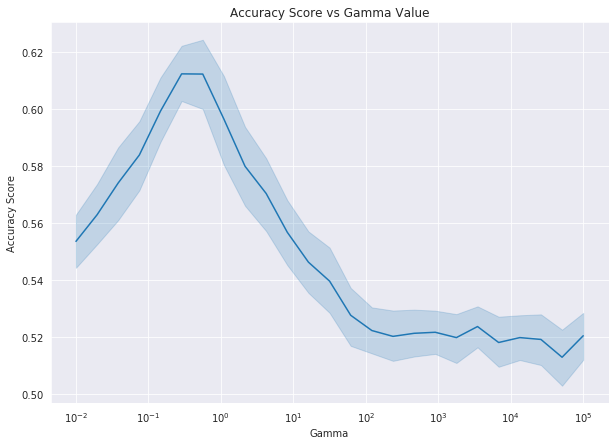

In [41]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10,7))
ax = sns.lineplot(x='param_gamma', y='mean_test_score', data=df)
ax.set_xscale('log')
ax.set_title('Accuracy Score vs Gamma Value')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Gamma');
fig.savefig('svm_param_gamma_plot.png')

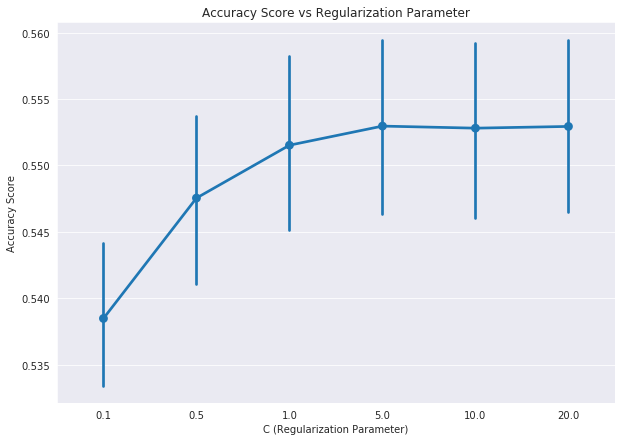

In [42]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10,7))
ax = sns.pointplot(x='param_C', y='mean_test_score', data=df)
ax.set_title('Accuracy Score vs Regularization Parameter')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('C (Regularization Parameter)');
fig.savefig('svm_param_C_plot.png')

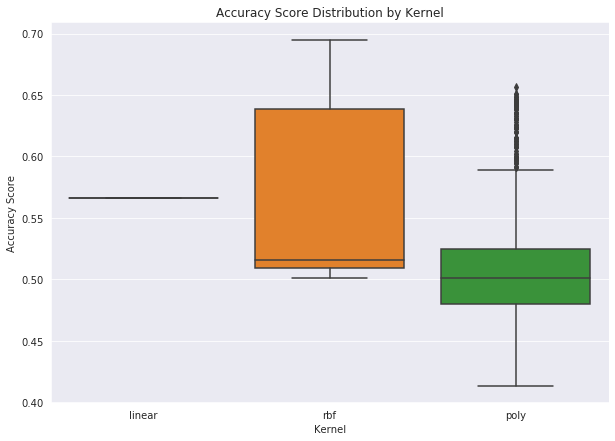

In [47]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10,7))
ax=sns.boxplot(x='param_kernel', y='mean_test_score', data=df)
ax.set_title('Accuracy Score Distribution by Kernel')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Kernel');
fig.savefig('svm_param_kernel_plot.png')

In [34]:
from joblib import load, dump
dump(cv.best_estimator_, 'best_svm.joblib')

['best_svm.joblib']

In [30]:
cv.best_params_

{'C': 10,
 'degree': 2,
 'gamma': 0.28729848333536656,
 'kernel': 'rbf',
 'max_iter': 100000}